### Question 1
(n,k) matrix implies n rows and k columns. Multiplication of (n,k) and (k,m) matrices will result in (n,m) matrix.
(i,j)th element will be the result of ith row and jth column. There are n*m elements in the final matrix.
For finding a single element we multiply corresponding elements of row of first matrix with column of the second matrix with are both of length k. This implies k multiplication corresponding to a single element. Then all these are added implies k-1 additions corresponding to each element of the resulting matrix. 
Hence, there will be k * m * n multiplications and (k-1) * m * n additions.

### Question 2

In [1]:
import numpy as np
import time


# matrix1=[[1,2,3,6],
#         [4,5,6,8],
#         [7,8,9,10]]
# matrix2=[[2,3],
#         [5,6],
#         [4,8],
#         [9,2]]
matrix1 = np.random.rand(100, 80)
matrix2 = np.random.rand(80, 60)
# Using list of lists
start=time.time()
def matrixmulti(mat1,mat2):
    k=len(mat1[0])
    m=len(mat2[0])
    n= len(mat1)
    matrix = []
    for _ in range(n):
        row = []
        for _ in range(m):
            row.append(0)
        matrix.append(row)
        
    for i in range(n):
        for j in range(m):
            for l in range(k):
                matrix[i][j]+=mat1[i][l]*mat2[l][j]
            
    return matrix



matrix = matrixmulti(matrix1,matrix2)
end=time.time()
# print(matrix)
print("The time required using list of lists",end-start)

The time required using list of lists 0.19150185585021973


In [80]:
# Using numpy
start=time.time()
result = np.dot(matrix1, matrix2)
end=time.time()
# print(result)
print("The time required using numpy",end-start)


The time required using numpy 0.024337053298950195


Numpy's matrix multiplication is faster because of - <br>
<b>Vectorization</b>: Mathematical operations are performed on entire arrays rather than looping through individual elements. This reduces overhead associated with looping. <br>
<b>C language backend</b>: C is low level, hence results in faster execution. 

### Question 3

In [3]:
#From the looping algorithm
import random
arr = [random.randint(1, 100) for _ in range(10000)]
#print(arr)
arr2=arr.copy()
arr3=arr.copy()

start=time.time()
if len(arr)%2==0:
    k=(len(arr)-2)//2
else:
    k=(len(arr)-1)//2
#print(k)


for j in range(k):
    maxe=None
    for i in range(len(arr)):
        if maxe==None or maxe<arr[i]:
            maxe=arr[i]
            ind=i
    arr[ind]=-1e9
#print(arr)
maxe=None
if len(arr)%2!=0:
    for i in range(len(arr)):
        if maxe==None or maxe<=arr[i]:
            maxe=arr[i]
    print(maxe)
else:
    max1,max2=None,None
    for i in range(len(arr)):
        if max1==None or max1<=arr[i]:
            max1=arr[i]
            ind1=i
    arr[ind1]=-1e9
    for i in range(len(arr)):
        if max2==None or max2<=arr[i]:
            max2=arr[i]
    print((max1+max2)/2)
end=time.time()
print("Time taken is",end-start)

50.0
Time taken is 2.9843668937683105


The time complexity of the above algorithm is $(O(n^2)$)

In [4]:
#After sorting the array
start=time.time()
arr2.sort()
#print(arr2)
if len(arr2)%2==0:
    med=(arr2[(len(arr2))//2 -1]+arr2[(len(arr2))//2] )/2
else:
    med = arr2[(len(arr2)+1)//2]
end=time.time()
print("The median of the array is",med)
print("The time taken is", end-start)

The median of the array is 50.0
The time taken is 0.0006949901580810547


The order of the above algorithm is $O(nlogn)$

In [5]:
#Using numpy.median
start=time.time()
med=np.median(arr3)
end=time.time()
print("The median is",med)
print("The time taken is",end-start)

The median is 50.0
The time taken is 0.0008378028869628906


### Question 4

The gradient of the expression wrt to x is - <br>
$2xy + \cos(x) \cdot y^3$

The gradient of the expression wrt to y is - <br>
$x^2 + 3(y^2) \cdot \sin(x)$



### Question 5

In [28]:
import jax
import jax.numpy as jnp

def func(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)

grad_x=jax.grad(func,argnums=0)
print("Gradient wrt x using jax at-")
print("x=1,y=1 is",grad_x(1.0,1.0))
print("x=2,y=3 is",grad_x(2.0,3.0))
print("x=4,y=5 is",grad_x(4.0,5.0))
print("\n")

def fun_x(x,y):
    return 2*x*y + jnp.cos(x) * (y**3)
print("x=1,y=1 is",fun_x(1.0,1.0))
print("x=2,y=3 is",fun_x(2.0,3.0))
print("x=4,y=5 is",fun_x(4.0,5.0))
print("\n")

print("Gradient wrt x using analytical solution at -")
grad_y=jax.grad(func,argnums=1)
print("Gradient wrt y using jax at-")
print("x=1,y=1 is",grad_y(1.0,1.0))
print("x=2,y=3 is",grad_y(2.0,3.0))
print("x=4,y=5 is",grad_y(4.0,5.0))
print("\n")
def fun_y(x,y):
    return (x**2) + 3*(y**2)*jnp.sin(x)
print("x=1,y=1 is",fun_y(1.0,1.0))
print("x=2,y=3 is",fun_y(2.0,3.0))
print("x=4,y=5 is",fun_y(4.0,5.0))
print("\n")

Gradient wrt x using jax at-
x=1,y=1 is 2.5403023
x=2,y=3 is 0.7640352
x=4,y=5 is -41.705452


x=1,y=1 is 2.5403023
x=2,y=3 is 0.7640352
x=4,y=5 is -41.705452


Gradient wrt x using analytical solution at -
Gradient wrt y using jax at-
x=1,y=1 is 3.524413
x=2,y=3 is 28.55103
x=4,y=5 is -40.76019


x=1,y=1 is 3.524413
x=2,y=3 is 28.55103
x=4,y=5 is -40.76019




### Question 6

In [32]:
import sympy as sp
x,y =sp.symbols('x y')
f= (x**2)*y + (y**3)*sp.sin(x)

print(sp.diff(f,x))
print(sp.diff(f,y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


### Question 7

In [42]:
dictionary={'2022':
                {'Branch1':
                    {'Roll No.':'1','Name': 'N1', 'Marks':{'Maths':'100' , 'English':'50'}
                    ,'Roll No.':'2','Name': 'N2', 'Marks':{'Maths':'80' , 'English':'70'}}
                ,'Branch2':
                    {'Roll No.':'1','Name': 'N3','Marks':{'Maths':'90' , 'English':'80'}
                    ,'Roll No.':'2','Name': 'N4','Marks':{'Maths':'54' , 'English':'30'}}
                    }
            ,'2023':
                {'Branch1':
                    {'Roll No.':'1','Name': 'N5','Marks':{'Maths':'50' , 'English':'30'}
                    ,'Roll No.':'2','Name': 'N6','Marks':{'Maths':'70' , 'English':'80'}}
                ,'Branch2':
                    {'Roll No.':'1','Name': 'N7','Marks':{'Maths':'60' , 'English':'30'}
                    ,'Roll No.':'2','Name': 'N8','Marks':{'Maths':'20' , 'English':'80'}}
                }
           }
print(dictionary)

{'2022': {'Branch1': {'Roll No.': '2', 'Name': 'N2', 'Marks': {'Maths': '80', 'English': '70'}}, 'Branch2': {'Roll No.': '2', 'Name': 'N4', 'Marks': {'Maths': '54', 'English': '30'}}}, '2023': {'Branch1': {'Roll No.': '2', 'Name': 'N6', 'Marks': {'Maths': '70', 'English': '80'}}, 'Branch2': {'Roll No.': '2', 'Name': 'N8', 'Marks': {'Maths': '20', 'English': '80'}}}}


### Question 8

In [43]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_data):
        self.students = []
        for student_data in branch_data:
            roll_no = student_data['Roll No.']
            name = student_data['Name']
            marks = student_data['Marks']
            student = Student(roll_no, name, marks)
            self.students.append(student)

class Year:
    def __init__(self, year_data):
        self.branches = {}
        for branch, students_data in year_data.items():
            self.branches[branch] = Branch(students_data)

class NestedDictionary:
    def __init__(self, data):
        self.years = {}
        for year, branches_data in data.items():
            self.years[year] = Year(branches_data)d

dictionary = {
    '2022': {
        'Branch1': [
            {'Roll No.': '1', 'Name': 'N1', 'Marks': {'Maths': '100', 'English': '50'}},
            {'Roll No.': '2', 'Name': 'N2', 'Marks': {'Maths': '80', 'English': '70'}}
        ],
        'Branch2': [
            {'Roll No.': '1', 'Name': 'N3', 'Marks': {'Maths': '90', 'English': '80'}},
            {'Roll No.': '2', 'Name': 'N4', 'Marks': {'Maths': '54', 'English': '30'}}
        ]
    },
    '2023': {
        'Branch1': [
            {'Roll No.': '1', 'Name': 'N5', 'Marks': {'Maths': '50', 'English': '30'}},
            {'Roll No.': '2', 'Name': 'N6', 'Marks': {'Maths': '70', 'English': '80'}}
        ],
        'Branch2': [
            {'Roll No.': '1', 'Name': 'N7', 'Marks': {'Maths': '60', 'English': '30'}},
            {'Roll No.': '2', 'Name': 'N8', 'Marks': {'Maths': '20', 'English': '80'}}
        ]
    }
}

nested_dict = NestedDictionary(dictionary)


### Question 9

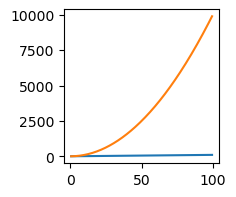

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2, 2))
x = np.arange(0.5,100.0,0.5)
y=x
plt.plot(x,y)


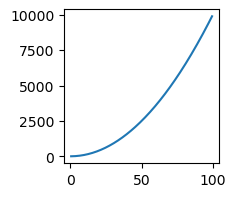

In [52]:
plt.figure(figsize=(2, 2))
y=x**2
plt.plot(x,y)

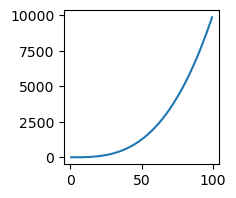

In [53]:
plt.figure(figsize=(2, 2))
y=(x**3)/100
plt.plot(x,y)

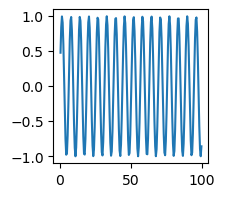

In [54]:
plt.figure(figsize=(2, 2))
y=np.sin(x)
plt.plot(x,y)

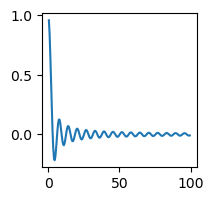

In [56]:
plt.figure(figsize=(2, 2))
y=np.sin(x)/x
plt.plot(x,y)

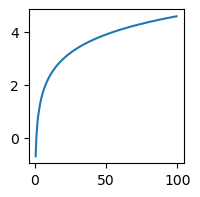

In [57]:
plt.figure(figsize=(2, 2))
y=np.log(x)
plt.plot(x,y)

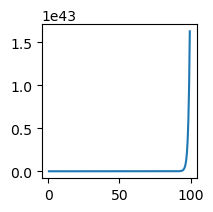

In [58]:
plt.figure(figsize=(2, 2))
y=np.exp(x)
plt.plot(x,y)

In [66]:
matrix=np.random.uniform(1,2,size=(20,5))
#print(matrix)
import pandas as pd
df=pd.DataFrame(matrix,columns=['a','b','c','d','e'])
print(df)

print("The index of the column with the highest std. dev. is", df.std().idxmax())
print("The index of the row with the lowest mean is",df.mean(axis=1).idxmin())

           a         b         c         d         e
0   1.149052  1.147753  1.357400  1.752496  1.121369
1   1.175798  1.051217  1.964150  1.155979  1.832720
2   1.538736  1.438104  1.779315  1.312510  1.912290
3   1.606965  1.767182  1.949582  1.440612  1.554502
4   1.621543  1.454262  1.780524  1.159543  1.376517
5   1.514556  1.383885  1.655245  1.472161  1.633471
6   1.673243  1.381984  1.388834  1.838888  1.162549
7   1.457849  1.776917  1.851965  1.219312  1.529060
8   1.443782  1.698593  1.681862  1.986124  1.522728
9   1.293031  1.125869  1.773554  1.093139  1.670710
10  1.303622  1.671050  1.993026  1.574573  1.795013
11  1.959756  1.092841  1.001567  1.445048  1.743027
12  1.271562  1.264894  1.276284  1.705705  1.837448
13  1.370075  1.282450  1.950392  1.608576  1.697874
14  1.125733  1.329713  1.044843  1.908313  1.666800
15  1.705399  1.768701  1.931512  1.355432  1.816583
16  1.918363  1.789690  1.065640  1.746194  1.940885
17  1.031309  1.570379  1.985598  1.312157  1.

### Question 11

In [72]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
#print(df)
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

print(df)
print("\n")
print("Number of rows with g=LT8",df[df['g'] == 'LT8'].shape[0])

print("Standard deviation of f where g is LT8 is",df.loc[df['g'] == 'LT8', 'f'].std())
print("Standard deviation of f where g is GT8 is",df.loc[df['g'] == 'GT8', 'f'].std())


           a         b         c         d         e         f    g
0   1.149052  1.147753  1.357400  1.752496  1.121369  6.528070  LT8
1   1.175798  1.051217  1.964150  1.155979  1.832720  7.179863  LT8
2   1.538736  1.438104  1.779315  1.312510  1.912290  7.980955  LT8
3   1.606965  1.767182  1.949582  1.440612  1.554502  8.318844  GT8
4   1.621543  1.454262  1.780524  1.159543  1.376517  7.392389  LT8
5   1.514556  1.383885  1.655245  1.472161  1.633471  7.659318  LT8
6   1.673243  1.381984  1.388834  1.838888  1.162549  7.445499  LT8
7   1.457849  1.776917  1.851965  1.219312  1.529060  7.835103  LT8
8   1.443782  1.698593  1.681862  1.986124  1.522728  8.333089  GT8
9   1.293031  1.125869  1.773554  1.093139  1.670710  6.956303  LT8
10  1.303622  1.671050  1.993026  1.574573  1.795013  8.337284  GT8
11  1.959756  1.092841  1.001567  1.445048  1.743027  7.242239  LT8
12  1.271562  1.264894  1.276284  1.705705  1.837448  7.355891  LT8
13  1.370075  1.282450  1.950392  1.608576  1.69

### Question 12

Broadcasting aligns dimensions to perform operations between arrays of different shapes.
Example:

In [81]:
arr1 = np.array([[57, 238, 3],
                 [34, 234, 45]])

arr2 = np.array([10, 20, 30])

arr1 is (2,3) and arr2 is (1,3) so arr2 will be broadcasted to match the size of arr1 by replicating along the necessary dimension.

In [82]:
print(arr1+arr2)

[[ 67 258  33]
 [ 44 254  75]]


### Question 13

In [79]:
def arg_min(arr):
    minm=None
    for i in range(len(arr)):
        if minm==None or arr[i]<minm:
            minm=arr[i]
            ind=i
    return ind

lst=[random.randint(1, 100) for _ in range(10000)]
print("From function:",arg_min(lst))

#verification
print("From numpy:",np.argmin(lst))

From function: 107
From numpy: 107
